## Market Size of EVs: Case Study
- Market Size Analysis is the process of estimating the potential sales for a product or service within a particular market segment. In the context of electric vehicles (EVs), it involves assessing the total volume of EV registrations to understand the growth of the market, forecast future trends, and help stakeholders make informed decisions regarding production, infrastructure development, and policy-making.

- The provided dataset contains the following columns, each representing different aspects of the electric vehicle (EV) population in the United States:

- The primary objective of this analysis is to leverage historical EV registration data to understand the current market penetration of EVs, predict future market growth, and identify key trends and factors driving market expansion. The specific goals include:

1. Assess the historical growth trend of EV registrations.
2. Forecast future EV registrations based on historical trends.
3. Analyze the distribution of EV registrations across different models, makes, and geographical regions.
4. Estimate the market size and growth potential of the EV market for upcoming years.
5. Provide insights to support stakeholders in decision-making processes related to production, infrastructure planning, and policy formulation.

In [16]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
#load the dataset
df = pd.read_csv('EV-data\Electric_Vehicle_Population_Data.csv')
df.head()
df.shape

(177866, 17)

In [18]:
df.info() 
#check for null values
df.isnull().sum()
#drop the null values
ev_df = df.dropna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [19]:
df['Model Year'].value_counts().sort_index(ascending=True)

1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       20
2010       23
2011      775
2012     1618
2013     4409
2014     3509
2015     4844
2016     5483
2017     8562
2018    14323
2019    10940
2020    11768
2021    19132
2022    27776
2023    57587
2024     7080
Name: Model Year, dtype: int64

### Analysis of EV Adoption Over time

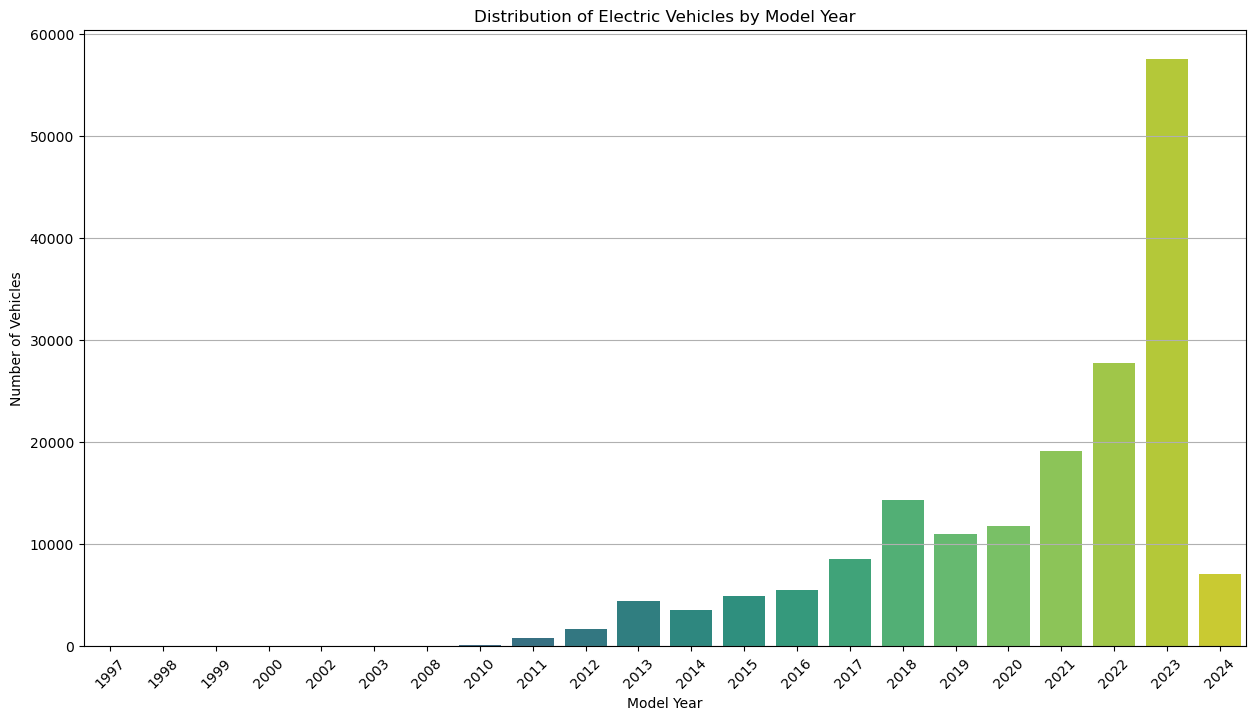

In [20]:
vehicle_count = ev_df["Model Year"].value_counts().sort_index()
plt.figure(figsize=(15, 8))
sns.barplot(x=vehicle_count.index, y=vehicle_count.values, palette='viridis')
plt.title('Distribution of Electric Vehicles by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

#### From the above barchat, EV adoption has been increasing over time from 2011 and there was a significant upward trend from 2017, with 2023 showing a sharp increase in the number of registered EVs

### Analysis of EV distribution over different geographical locations


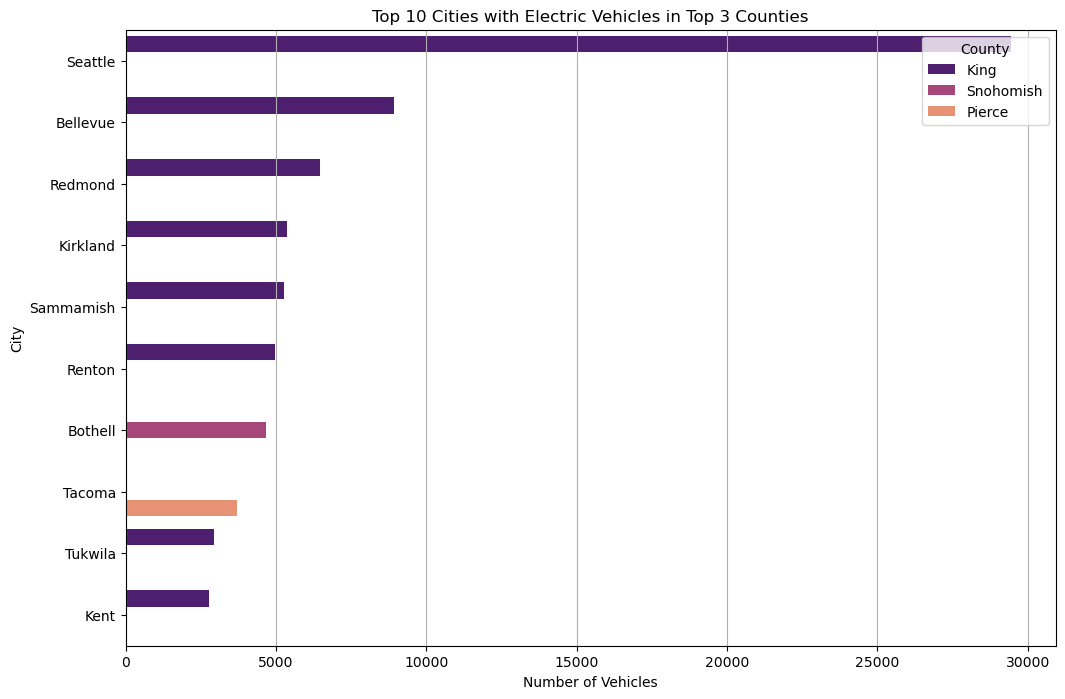

In [21]:
#EV registration in different counties
ev_county_distribution = ev_df['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

#filter the DataFrame for the top counties
ev_top_counties = ev_df[ev_df['County'].isin(top_counties)]

#analyse the distribution of EVs within the cities
ev_city_distribution_top_counties = ev_top_counties.groupby(["County","City"]).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')
top_cities = ev_city_distribution_top_counties.head(10)

#plot the top 10 cities across the top 3 counties
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Top 10 Cities with Electric Vehicles in Top 3 Counties')
plt.xlabel('Number of Vehicles')
plt.ylabel('City')
plt.legend(title='County', loc='best')
plt.grid(axis="x")
plt.show()


#### the above graph compares the number of electric vehicles registered in various cities within 3 counties. The horizontal bars represent cities, and their length corresponds to the number of vehicles registered, colour-coded by county. Here are the key findings from the above graph:

- The top 3 counties with the highest number of EV registrations are King County, Snohomish County, and Pierce County.
 
- Seattle City in King's County has hte highest number of registered vehicles, followed by Bellebue, Redmond and Kirkland

- Cities in Snohomish and Pierce Counties have moderate EV registrations

- Overall, the graph indicates that EV adoption is not uniform across the cities and is more concentrated in certain areas, particularly King's County. 


### Analysis of the dominant EV types/Manufacturers.

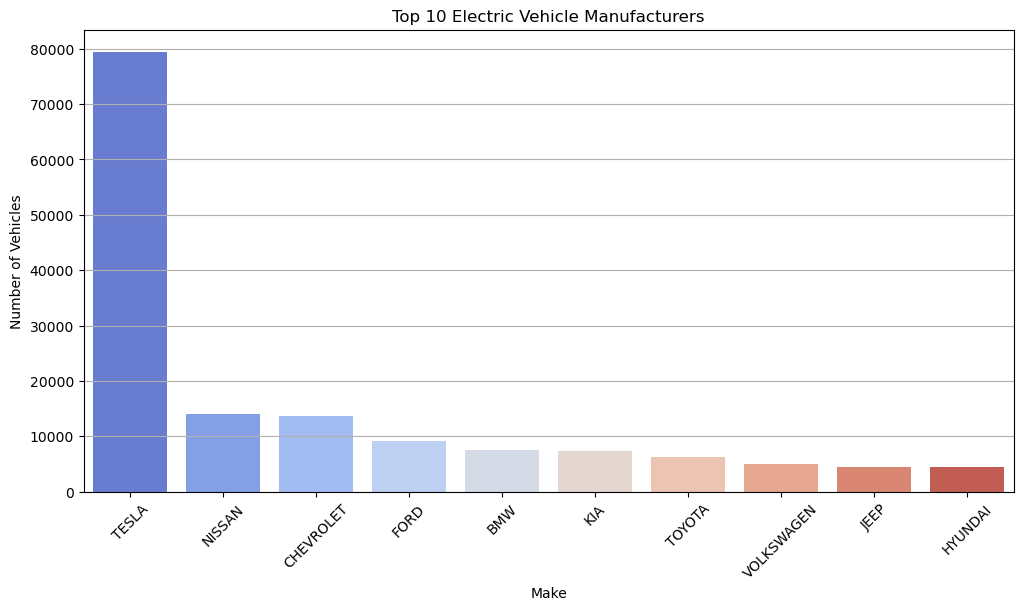

In [22]:
#plot the top manufacturers of electric vehicles
plt.figure(figsize=(12, 6))
make = ev_df['Make'].value_counts().head(10).index
make_counts = ev_df['Make'].value_counts().head(10).values
sns.barplot(x = make, y= make_counts, palette='coolwarm')
plt.title('Top 10 Electric Vehicle Manufacturers')
plt.xlabel('Make')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

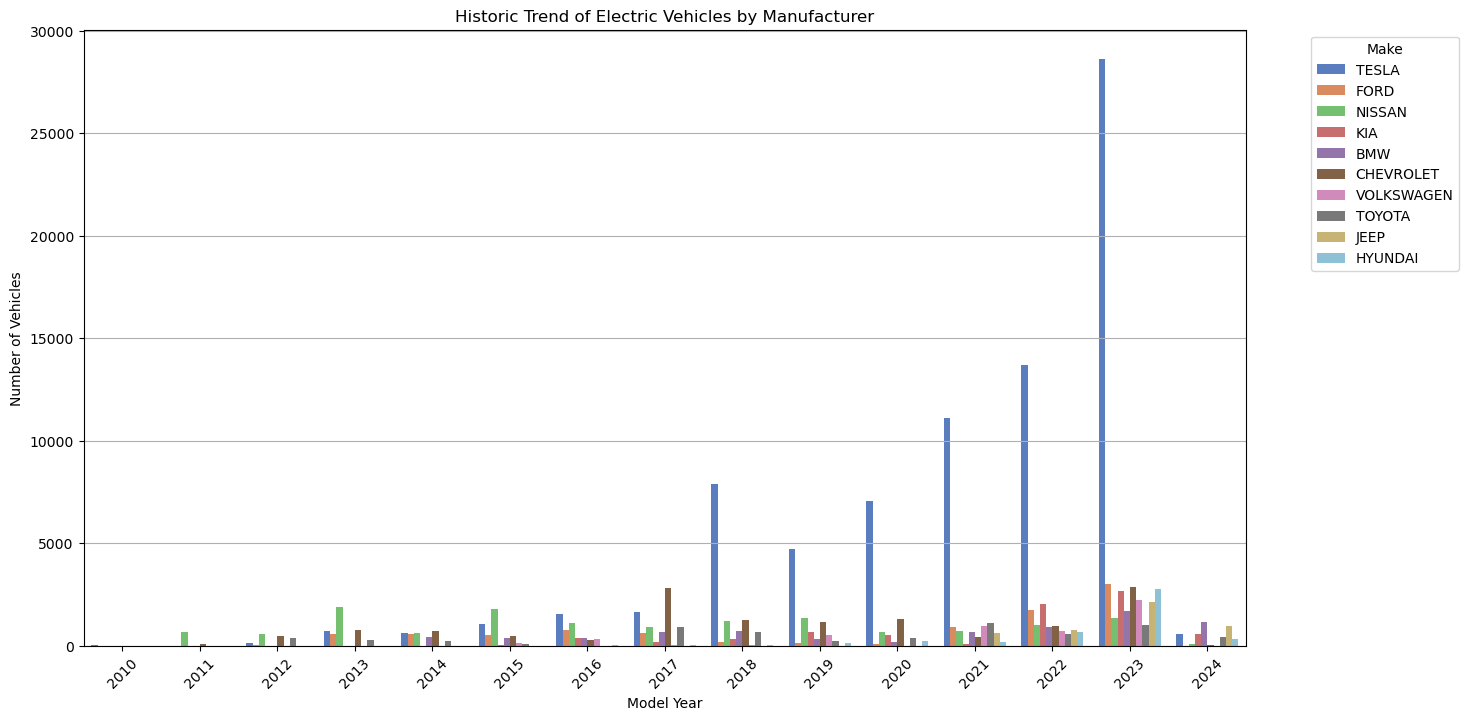

In [23]:
#filter the dataframe for the top 10 manufacturers from 2010
ev_top_makes = ev_df[ev_df['Make'].isin(make)]
ev_top_makes_from_2010 = ev_top_makes[ev_top_makes["Model Year"] >= 2010]
#plot the historic trend of electric vehicles by manufacturer
plt.figure(figsize=(15, 8))
sns.countplot(data=ev_top_makes_from_2010, x='Model Year', hue='Make', palette='muted')
plt.title('Historic Trend of Electric Vehicles by Manufacturer')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='best')
plt.show()

#### The above plots show that Tesla dominates the market for electric Vehicles registration over recent years
- From 2011 - 2015 Nissan had the most registrations of electric vehicles while the other manufucturers had an average registration of their electric vehicles.

- Chevrolet had the highest number of electric vehicle registrations in 2017 followed by Tesla followed by the other manufuctures.

- Tesla has dominated the registration of electrical vehicles consistently from 2017 and reaching a peak in 2023.


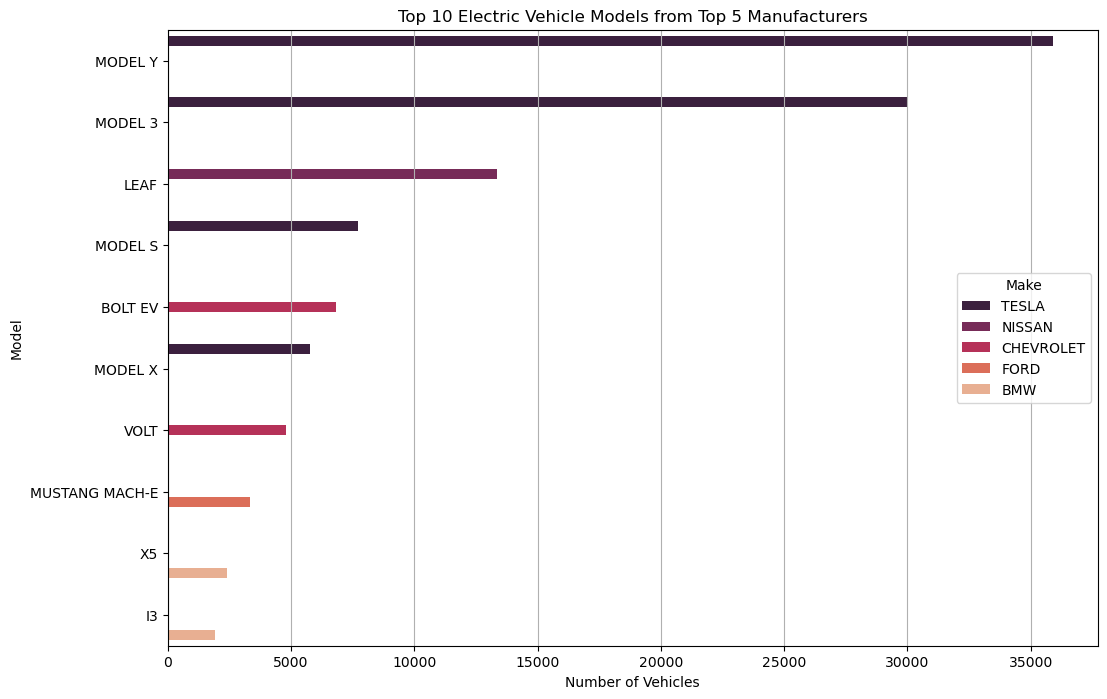

In [24]:
# identify the most popular models from the top manufacturers
top_5_makes = ev_df['Make'].value_counts().head(5).index

ev_top_makes = ev_df[ev_df['Make'].isin(top_5_makes)] #subset the DataFrame for the top 5 makes
# ev_top_models = ev_top_makes['Model'].value_counts().head(10).index


# #plot the top 10 models from the top 5 manufacturers
ev_model_distribution_top_makes = ev_top_makes.groupby(["Make","Model"]).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')
top_models = ev_model_distribution_top_makes.head(10)
top_models
#plot the top 10 models from the top 5 manufacturers 
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="rocket")   
plt.title('Top 10 Electric Vehicle Models from Top 5 Manufacturers')    
plt.xlabel('Number of Vehicles')
plt.ylabel('Model')
plt.legend(title='Make', loc='best')
plt.grid(axis="x")
plt.show()

##### TESLA'S MODEL Y and MODEL 3 are the most popular models followed by the NISSAN'S LEAF 
- TESLA’s MODEL Y and MODEL 3 are the most registered vehicles, with MODEL Y having the highest number of registrations.

- NISSAN’s LEAF is the third most registered model and the most registered non-TESLA vehicle.

- TESLA’s MODEL S and MODEL X also have a significant number of registrations.

- CHEVROLET’s BOLT EV and VOLT are the next in the ranking with considerable registrations, followed by BOLT EUV.

- FORD'S MUSTANG MACH-E and BMW'S X5 and I3 have the lowest number of registrations among the models shown

### Analysis of the different types of EV types


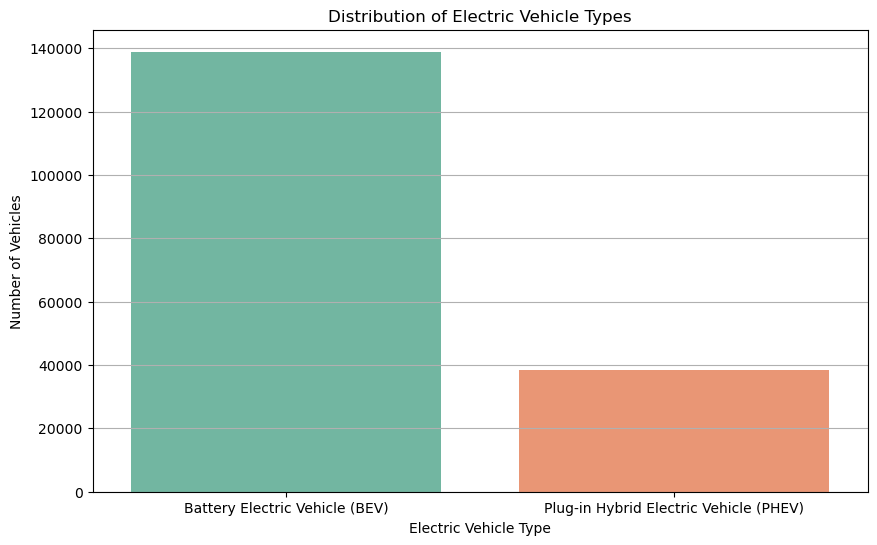

In [25]:
ev_df["Electric Vehicle Type"].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(data=ev_df, x='Electric Vehicle Type', palette='Set2')
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Number of Vehicles')
plt.grid(axis="y")
plt.show()

#### The above graph shows what Battery Electric Vehicle is more popular than PHEV.

### Analysis of the Vehicles' electric Range

- The maximum range of the vehicle on a single charge (in miles).

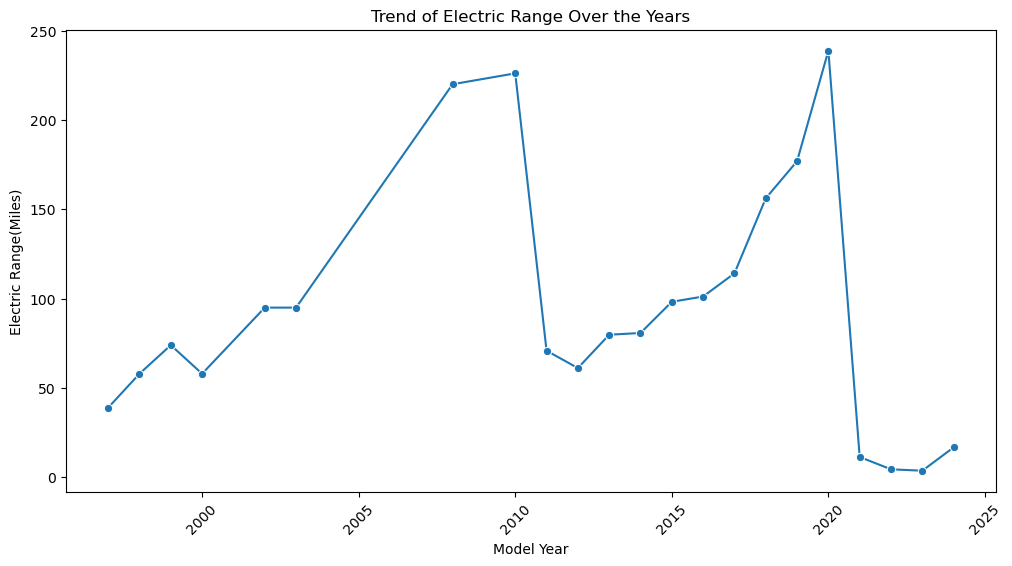

In [26]:
# calculate the trend of electric range over the years
electric_range_years = ev_df.groupby('Model Year')['Electric Range'].mean().reset_index().sort_values(by='Model Year')
plt.figure(figsize=(12, 6))
sns.lineplot(data = electric_range_years, x='Model Year', y='Electric Range', marker='o')
plt.title('Trend of Electric Range Over the Years')
plt.xlabel('Model Year')
plt.ylabel("Electric Range(Miles)")
plt.xticks(rotation=45)
plt.show()

#### There was a steady increase in the electric range over the years from 2000 - 2024
 - There was a peak in 2020 when the average range reached its peak.
 
 - This was then followed by a steep drop after 2020 indicating that data may be incomplete or reflect the introduction of several lower-range models

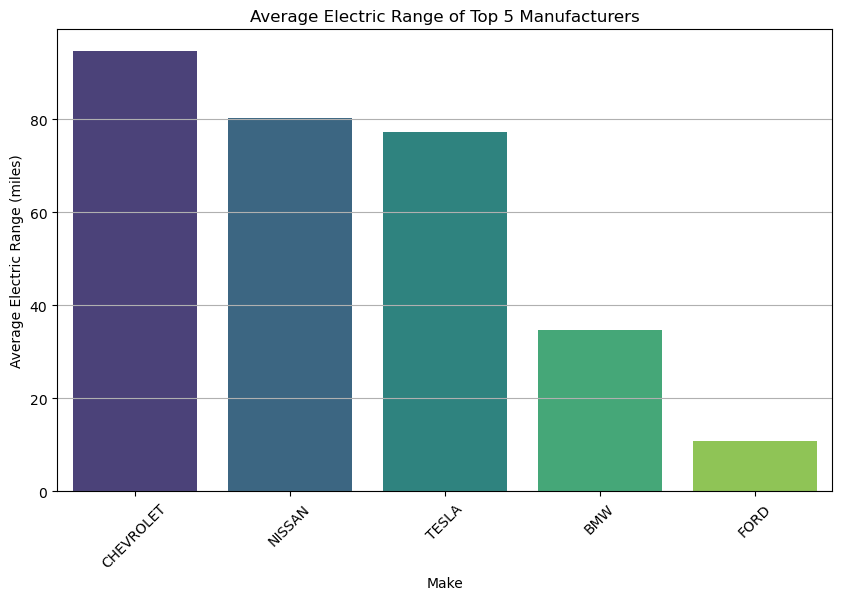

In [27]:
#get the electric range of the top 5 manufacturers
ev_electric_range = ev_top_makes.groupby('Make')['Electric Range'].mean().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=ev_electric_range.index, y=ev_electric_range.values, palette='viridis')
plt.title('Average Electric Range of Top 5 Manufacturers')
plt.xlabel('Make')
plt.ylabel('Average Electric Range (miles)')
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


#### The plots show that CHEVROLET has the best electric range of the top 5 makes followed by NISSAN and TESLA.

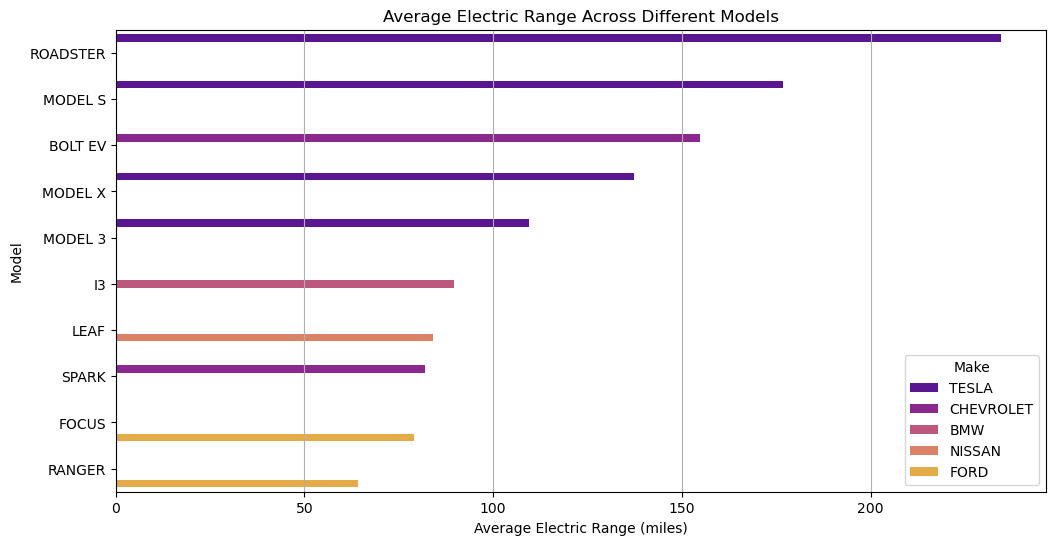

In [28]:
#electric range across the different models
ev_model_range = ev_top_makes.groupby(["Make" ,"Model"])['Electric Range'].mean().sort_values(ascending=False).reset_index()
top_models_range = ev_model_range.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x = "Electric Range", y="Model", hue = "Make",data = top_models_range,palette='plasma')
plt.title('Average Electric Range Across Different Models')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='best')
plt.grid(axis="x")
plt.show()

#### The TESLA ROADSTER and MODEL S have the highest average electric range, followed closely by the CHEVROLET BOLT EV. TESLA'S MODEL X and MODEL 3 also occupy the top positions showing that TESLA's vehicles have higher electric ranges compared to the rest.

### Estimate the Market Size and growth potential for the upcoming years

In [29]:
ev_df["Model Year"].value_counts().reset_index().rename(columns={"index": "Model Year", "Model Year": "Number of Vehicles"})

,Model Year,Number of Vehicles
0,2023,57519
1,2022,27708
2,2021,19063
3,2018,14286
4,2020,11740
5,2019,10913
6,2017,8534
7,2024,7072
8,2016,5469
9,2015,4826


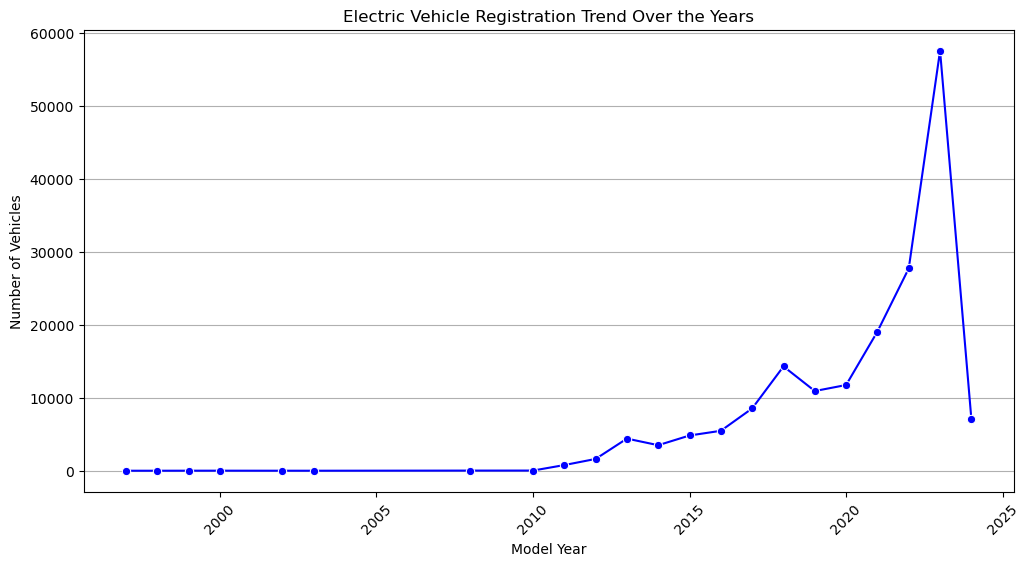

In [30]:
# ev registration trend over the years
years_trend = ev_df["Model Year"].value_counts().reset_index(name='Number of Vehicles').rename(columns={'index': 'Model Year'})
plt.figure(figsize=(12, 6))
sns.lineplot(x= "Model Year", y = "Number of Vehicles", data=years_trend, marker='o', color='blue')
plt.title('Electric Vehicle Registration Trend Over the Years')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


In [31]:
years_trend = years_trend[years_trend["Model Year"] < 2024]  

In [32]:
#use an ARIMA model to forecast the trend of electric vehicle registrations
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Prepare the data for ARIMA
#split the data into the training and test set
split = int(len(ev_df) * 0.80)
train_data = years_trend[:split]
test_data = years_trend[split:]


In [33]:
train_data.shape, test_data.shape
train_data.set_index('Model Year', inplace=True)
train_data.sort_index(inplace=True)

C:\Users\josep\AppData\Local\Temp\ipykernel_30904\2584366170.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.sort_index(inplace=True)


c:\Users\josep\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


ADF Statistic: 5.239900167008793
p-value: 1.0
The data is not stationary.


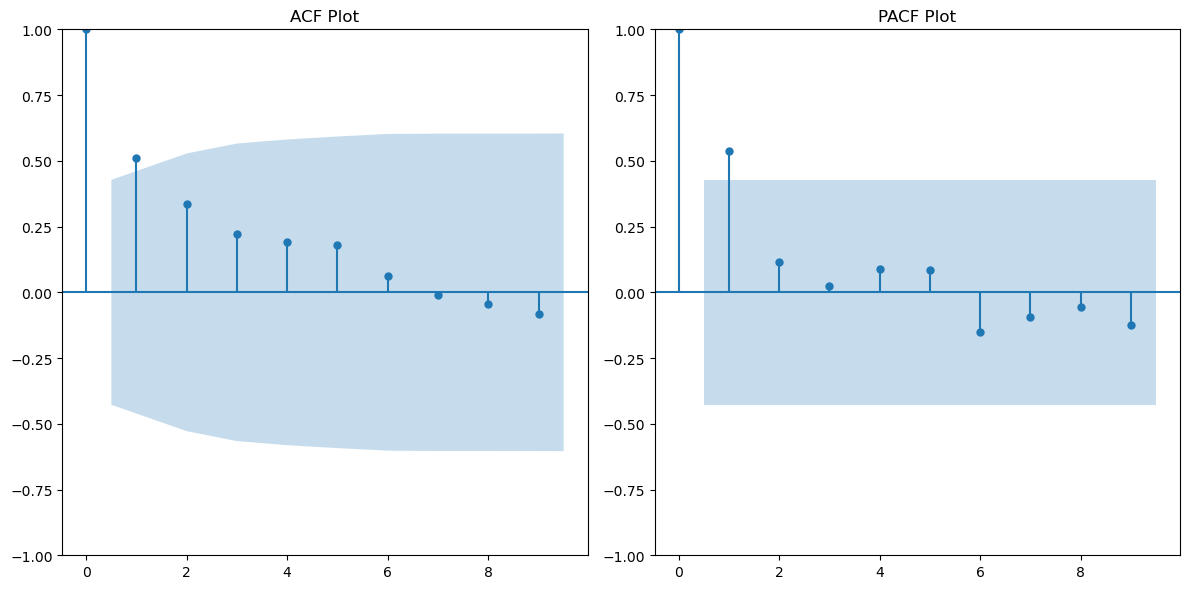

In [34]:
#check if the data is stationary
def check_stationarity(data):
    result = adfuller(data['Number of Vehicles'])
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] <= 0.05:
        print("The data is stationary.")
    else:
        print("The data is not stationary.")

check_stationarity(train_data)
# Plot ACF and PACF to determine p and q
def plot_acf_pacf(data):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plot_acf(data['Number of Vehicles'], lags=9, ax=plt.gca())
    plt.title('ACF Plot')
    
    plt.subplot(1, 2, 2)
    plot_pacf(data['Number of Vehicles'], lags=9, ax=plt.gca())
    plt.title('PACF Plot')
    
    plt.tight_layout()
    plt.show()
plot_acf_pacf(train_data)

In [35]:
#fit the ARIMA model
model = ARIMA(train_data['Number of Vehicles'], order=(1, 1, 0))  
model_fit = model.fit()
model_fit.summary()

c:\Users\josep\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\josep\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\josep\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\josep\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     Number of Vehicles   No. Observations:                   21
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -201.048
Date:                Thu, 19 Jun 2025   AIC                            406.097
Time:                        16:41:15   BIC                            408.088
Sample:                             0   HQIC                           406.485
                                 - 21                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.158      6.342      0.000       0.691       1.309
sigma2      3.022e+07   5.23e-09   5.78e+15      0.000    3.02e+07    3.02e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                49.80
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):          942511.91   Skew:                             2.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.07e+30. Standard errors may be unstable.
"""

In [36]:
train_data.reset_index(inplace=True)

In [37]:
train_data["Model Year"] = pd.to_datetime(train_data["Model Year"], format='%Y')
train_data = train_data[train_data["Model Year"] < pd.to_datetime('2024-01-01')]
train_data

,Model Year,Number of Vehicles
0,1997-01-01,1
1,1998-01-01,1
2,1999-01-01,5
3,2000-01-01,7
4,2002-01-01,2
5,2003-01-01,1
6,2008-01-01,19
7,2010-01-01,23
8,2011-01-01,775
9,2012-01-01,1614


c:\Users\josep\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


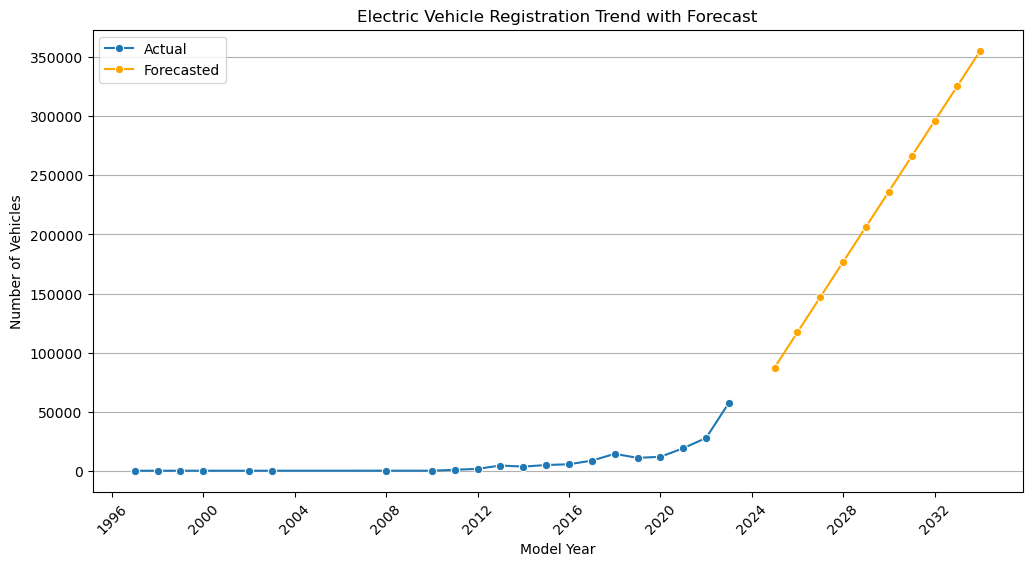

In [38]:
# #forecast 
forecast = model_fit.forecast(steps=10) 

# Combine the forecast with the test data
forecast_df = pd.DataFrame({
    'Model Year': pd.date_range(start=train_data['Model Year'].iloc[-1]+ pd.DateOffset(years=1), periods=10, freq='Y'),
    'Forecasted Vehicles': forecast
})
plt.figure(figsize=(12, 6))
sns.lineplot(data=train_data, x='Model Year', y='Number of Vehicles', label='Actual', marker='o')
sns.lineplot(data=forecast_df, x='Model Year', y='Forecasted Vehicles', label='Forecasted', marker='o', color='orange')     
plt.title('Electric Vehicle Registration Trend with Forecast')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis="y")
plt.show()


#### There's an exponential projection of the number of registered electrical vehicles for the next 10 years, we need to apply log transformation to smooth the forecast.

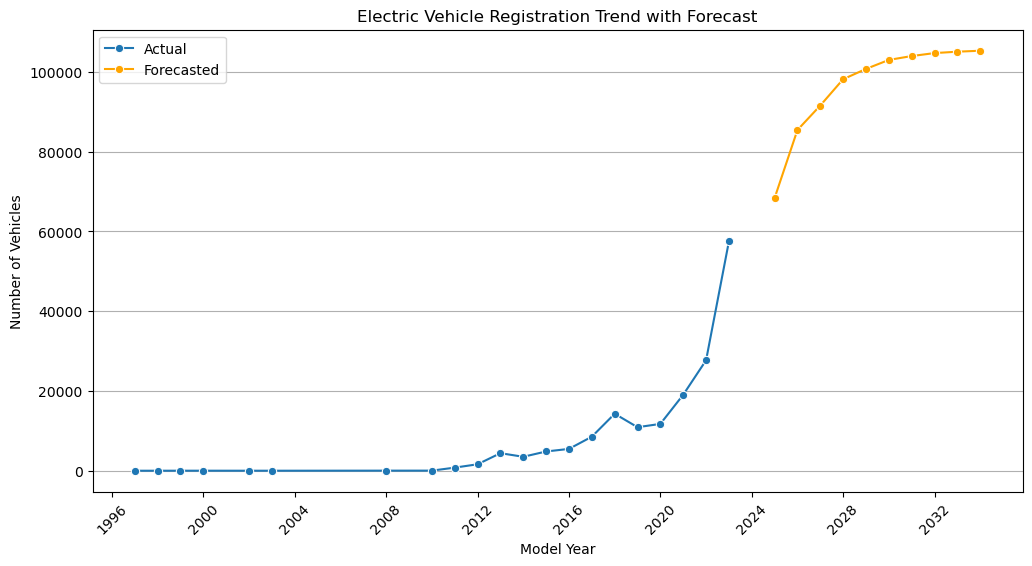

In [39]:
#fit the ARIMA model with logg transformed data
train_data['Log_Vehicles'] = np.log(train_data['Number of Vehicles'])
model_log = ARIMA(train_data['Log_Vehicles'], order=(2, 1, 0))  
model_log_fit = model_log.fit()
# Forecast using the log-transformed model
forecast_log = model_log_fit.forecast(steps=10)
# Convert the forecast back to the original scale
forecast_log_original = np.exp(forecast_log)

# Combine the forecast with the test data
forecast_log_df = pd.DataFrame({
    'Model Year': pd.date_range(start=train_data['Model Year'].iloc[-1] + pd.DateOffset(years=1), periods=10, freq='Y'),
    'Forecasted Vehicles': forecast_log_original
})
#plot the forecasted values
plt.figure(figsize=(12, 6))
sns.lineplot(data=train_data, x='Model Year', y='Number of Vehicles', label='Actual', marker='o')
sns.lineplot(data=forecast_log_df, x='Model Year', y='Forecasted Vehicles', label='Forecasted', marker='o', color='orange')
plt.title('Electric Vehicle Registration Trend with Forecast')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis="y")
plt.show()


#### The forecast still shows an increased in the registered Electric vehicles but with no exponential growth over the years.
- The market of Electric vehicles is promising based on the market size analysis, that determines the potential sales volume within a given market.
- From this market size analysis, investments and more business opportunities in electric vehicles should be looked into as it has a promising future.
